In [3]:
pip install -r requirements.txt


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 60.4 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19483 sha256=4da10c079d8e6beb2bf3fd4c80702138a35a5a2adf97a8f6142be08f4e7e79f5
  Stored in directory: /root/.cache/pip/wheels/70/0c/a4/7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built image


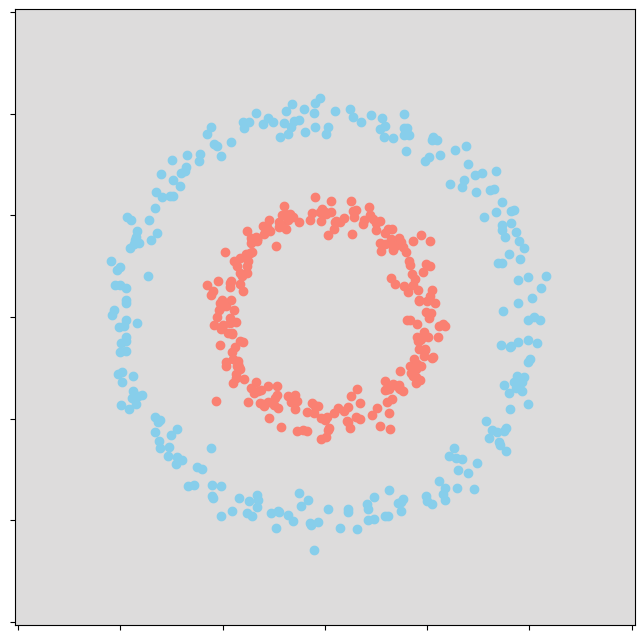

In [4]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# crear datos artificiales para clasificar dos anillos concentricos
X, Y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=1)

# Resolución del mapa de predicción.
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)


In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # Evita warnings

from matplotlib import animation
from IPython.core.display import display, HTML

# Se definen los puntos de entrada de la red para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', [None])

lr = 0.01    # learning rate
nn = [2, 16, 8, 1]  # número de neuronas en cada capa

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')
# Vector de predicciones de Y
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# Evaluación de las predicciones
loss = tf.losses.mean_squared_error(pY, iY)

# Optimizador para minimizar error
#optimizer = tf.train.GradientDescentOptimizer(leaning_rate=0.05).minimize(loss)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss) #Fixed typo: leaning_rate -> learning_rate
n_steps = 1000 # Número de ciclos de entrenamiento.
iPY = []   # Donde se guarda la evolución de las predicciones para la animación.

with tf.Session() as sess:
  # inician los parámetros de la red, las matrices W y b
  sess.run(tf.global_variables_initializer())
  # Iteramos n pases de entrenamiento
  for step in range(n_steps):
    # Evaluamos al optimizador, la función de coste y al tensor de salida pY
    # La evaluación del optimizer producitrá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX: X, iY: Y})
    if step % 25 == 0:
      # Calculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      # Impresión de métricas.
      print('Step: ', step, '/', n_steps, '- Loss: ', _loss, 'Accuracy: ', acc)
      # Obtenemos predicciones para cada punto del para de predicción _pX.
      _pY = sess.run(pY, feed_dict={iX: _pX}).reshape((res, res))
      # Almacenamos las predicciones para la animación.
      iPY.append(_pY)

# --- Código de animación ---
ims = []
fig = plt.figure(figsize=(10, 10))
print(" ---- Generando animación ---- ")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  # Visualización nube de datos
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())
plt.close()
display(HTML(ani.to_jshtml()))

Output hidden; open in https://colab.research.google.com to view.